In [1]:
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

In [2]:
def init_grid(len, height):
  dx,dy = 1
  grid = np.zeros([int(len/dx),int(height/dy)])

  return grid

In [3]:
def init_cond(len,height):
  dx,dy = 1
  grid_cond = np.ones([int(len/dx),int(height/dy)], dtype = bool)
  
  return grid_cond

In [4]:
def sweep(grid, frame, W):
  stencil = np.array([[0,1,0],[1,-4,1], [0,1,0]])
  output = np.zeros_like(grid)
  len, height = grid.shape
  # Bounded diagonal Matrix settings for both black and white for checkeredboard pattern.
  M_black = np.zeros(grid.shape, dtype = bool)
  M_black[::2, ::2] = True
  M_black[1::2, 1::2] = True
  frame_black = M_black * frame

  M_white = np.ones(grid.shape, dtype = bool)
  M_white[::2, ::2] = False
  M_white[1::2, 1::2] = False
  frame_white = M_white * frame

  # Convolve.
  
  # Black
  grid[frame_black] += (W/4) * ndimage.convolve(grid, stencil, output = output, mode = 'constant', cval = 0)[frame_black]

  # White 
  grid[frame_white] += (W/4) * ndimage.convolve(grid, stencil, output = output, mode = 'constant', cval = 0)[frame_white]

  return grid

In [5]:
# Layer Grids to solve.
def coarse_grid(grid, grid2, x1, x2, y1, y2, pot):
  #Extract smaller grid points from the grid initialized.
  len, height = grid.shape
  x1_g = int(x1*len)
  x2_g = int(x2*len)
  y1_g = int(y1*height)
  y2_g = int(y2*height)

  # -- 

  dx = x2_g - x1_g
  dy = y2_g - y1_g

  if dx == 0:
    m = 0
  else:
    m = dy/dx


  # Potential
  for i in range(len):
    if x2_g >= i and i >= x1_g:
      for jj in range(height):
        if jj == int(m * i + (y1_g - m * x1_g)) and y2_g >= jj and jj >= y1_g:
          grid[jj,i] = pot
          grid2[jj,i] = False
  return grid, grid2







  



In [6]:
# 0 <= W <= 2 is SOR. Closer to 2.


W = 1.9
init_grid = np.zeros([100,100])
init_cond = np.ones([100,100], dtype = bool)

init_grid, boundries = coarse_grid(init_grid, init_cond, 0.1,0.9,0.5,0.6,1500)


for i in range(5000):
  init_grid = sweep(init_grid, boundries, W)
  
  if i % 1000 == 0:
    print(i)





0
1000
2000
3000
4000


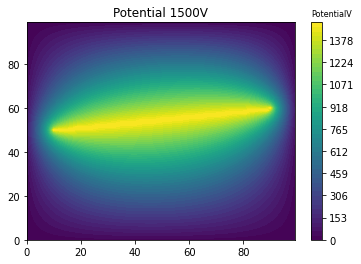

In [7]:
plt.figure()
plt.title("Potential 1500V")
levels = np.linspace(0, 1500, 50)
cbar = plt.colorbar(plt.contourf(init_grid, levels=levels))
cbar.ax.set_title("PotentialV", fontsize=8, loc="left")
plt.savefig('Potential_1500V.png')